In [1]:
from pathlib import Path
import os
cwd_path = Path.cwd(); set_path = str(cwd_path.parent.parent); os.chdir(set_path)

In [2]:
import torch
from FittedModels.utils.plotting_utils import plot_sampling_info, plot_divergences
torch.manual_seed(5)
from ImportanceSampling.VanillaImportanceSampler import VanillaImportanceSampling
from FittedModels.train import LearntDistributionManager
from Utils.numerical_utils import quadratic_function as expectation_function
from FittedModels.Models.FlowModel import FlowModel
from FittedModels.utils.plotting_utils import plot_history
import matplotlib.pyplot as plt
from TargetDistributions.VincentTargets import TwoModes
from FittedModels.utils.plotting_utils import plot_samples_vs_contours
from FittedModels.utils.plotting_utils import plot_distributions

In [3]:
def plotter(*args, **kwargs):
    # wrap plotting function like this so it displays during training
    plot_samples_vs_contours(*args, **kwargs)
    plt.show()

In [4]:
target = TwoModes(2.0, 0.1)

# Same settings as Vincen'ts model

In [10]:
torch.manual_seed(1)
torch.set_default_dtype(torch.float64)
# ******************* Parameters *******************
# using the same as Vincent's code so we have a fair comparison
dim = 2
epochs = int(2e4)
n_samples_estimation = int(1e5)
batch_size = 20
lr = 1e-3
weight_decay = 1e-6
optimizer = "Adam"
flow_type = "RealNVP"  
loss_type = "kl"
initial_flow_scaling = 1.0
n_flow_steps = 64
annealing = True
clip_grad_norm = False
n_plots = 20

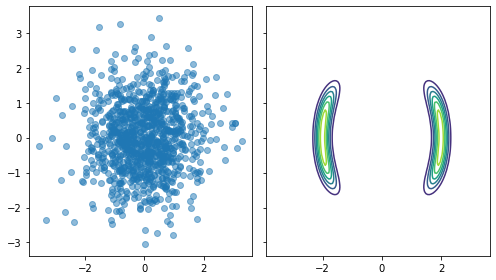

loss: -2.9408377528852183, mean log p_x -23.11012257631321:   0%|          | 0/20000 [00:00<?, ?it/s]

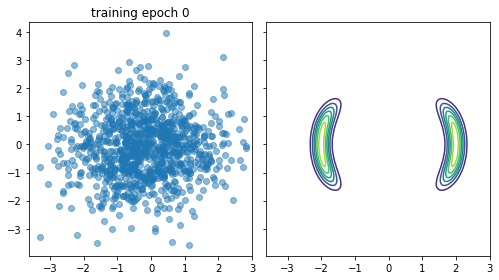

loss: -2.5547681354786564, mean log p_x -7.300388424092896:   5%|▌         | 1000/20000 [02:19<40:30,  7.82it/s]  

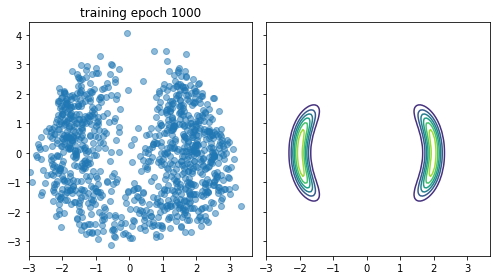

loss: -2.5547681354786564, mean log p_x -7.300388424092896:   5%|▌         | 1002/20000 [02:19<1:07:46,  4.67it/s]

ESS is 0.13523800034710623


loss: -1.2913262350860266, mean log p_x -8.642193567057857:  10%|█         | 2000/20000 [04:37<38:35,  7.77it/s]  

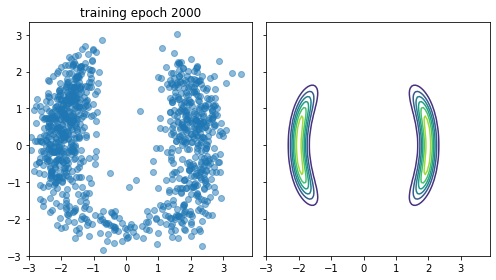

loss: -1.2913262350860266, mean log p_x -8.642193567057857:  10%|█         | 2002/20000 [04:38<1:03:29,  4.72it/s]

ESS is 0.22860247065987488


loss: -1.352284435475509, mean log p_x -2.3669824310389074:  15%|█▌        | 3000/20000 [06:53<36:08,  7.84it/s]  

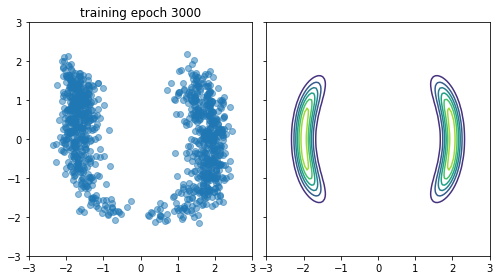

loss: -1.352284435475509, mean log p_x -2.3669824310389074:  15%|█▌        | 3002/20000 [06:54<58:19,  4.86it/s]  

ESS is 0.2774469053180136


loss: -1.4423688519931703, mean log p_x -2.615219442226132:  20%|██        | 4000/20000 [09:10<35:58,  7.41it/s] 

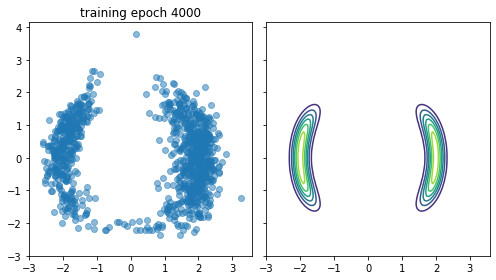

loss: -1.4423688519931703, mean log p_x -2.615219442226132:  20%|██        | 4002/20000 [09:11<1:03:07,  4.22it/s]

ESS is 0.3438523383453533


loss: -1.1424038930764204, mean log p_x -1.445949385957372:  25%|██▌       | 5000/20000 [11:30<33:34,  7.45it/s]  

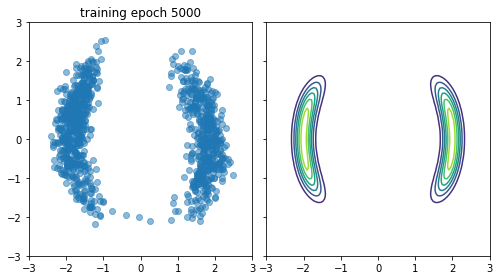

loss: -1.1424038930764204, mean log p_x -1.445949385957372:  25%|██▌       | 5002/20000 [11:31<54:39,  4.57it/s]  

ESS is 0.39125170535593806


loss: -1.1470485526651513, mean log p_x -1.0805363374608277:  30%|███       | 6000/20000 [13:48<30:28,  7.66it/s]

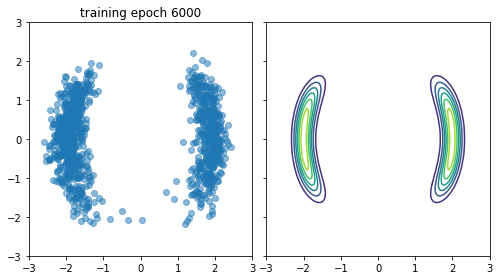

loss: -1.1470485526651513, mean log p_x -1.0805363374608277:  30%|███       | 6002/20000 [13:48<49:09,  4.75it/s]

ESS is 0.4389141089170138


loss: -0.9956356919193544, mean log p_x -1.164702439833064:  35%|███▌      | 7000/20000 [16:07<32:41,  6.63it/s] 

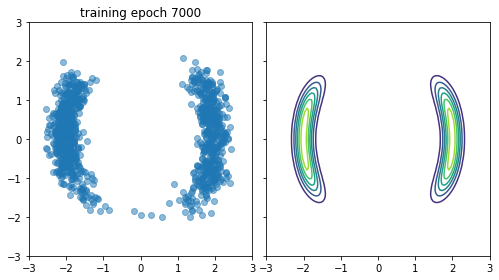

loss: -0.9956356919193544, mean log p_x -1.164702439833064:  35%|███▌      | 7002/20000 [16:07<49:06,  4.41it/s]

ESS is 0.4802386463041704


loss: -0.9956356919193544, mean log p_x -1.164702439833064:  35%|███▌      | 7095/20000 [16:20<29:42,  7.24it/s]


KeyboardInterrupt: 

In [11]:
torch.manual_seed(1)  # 0
learnt_sampler = FlowModel(x_dim=dim, n_flow_steps=n_flow_steps,
                           scaling_factor=initial_flow_scaling, flow_type=flow_type)
tester = LearntDistributionManager(target, learnt_sampler, VanillaImportanceSampling, loss_type=loss_type,
                                   lr=lr, optimizer=optimizer, annealing=annealing, weight_decay=weight_decay)

plot_samples_vs_contours(tester)
plt.show()
expectation_before, info_before = tester.estimate_expectation(n_samples_estimation, expectation_function)


history = tester.train(epochs, batch_size=batch_size, clip_grad_norm=clip_grad_norm, max_grad_norm=1,
                       intermediate_plots=True, plotting_func=plotter, n_plots=n_plots)
plot_history(history)
plt.show()
plot_divergences(history)
plt.show()
plot_sampling_info(history)
plt.show()

expectation, info = tester.estimate_expectation(n_samples_estimation, expectation_function)

print(f"estimate before training is {expectation_before} \n"
      f"estimate after training is {expectation} \n"
      f"effective sample size before is {info_before['effective_sample_size'] / n_samples_estimation}\n"
      f"effective sample size after train is {info['effective_sample_size'] / n_samples_estimation}\n"
      f"variance in weights is {torch.var(info['normalised_sampling_weights'])}")

plot_samples_vs_contours(tester, n_samples=1000)
plt.show()

In [ ]:
n_samples_estimation = int(1e6)

In [ ]:
expectation, info = tester.estimate_expectation(n_samples_estimation, expectation_function)

print(f"estimate before training is {expectation_before} \n"
      f"estimate after training is {expectation} \n"
      f"effective sample size before is {info_before['effective_sample_size'] / n_samples_estimation}\n"
      f"effective sample size after train is {info['effective_sample_size'] / n_samples_estimation}\n"
      f"variance in weights is {torch.var(info['normalised_sampling_weights'])}")